##Classification ,  Decision Tree's and K Nearest Neighbhours

Classification in machine learning is a supervised learning technique used to categorize data into predefined classes or categories. It involves training a model on labeled data to learn the relationships between input features and their corresponding classes, enabling the model to predict the class of new, unseen data. 

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features

Some advantages of decision trees are:

Simple to understand and to interpret. Trees can be visualized.

Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

The disadvantages of decision trees include:

Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.


Algorithms used to build Decision Tree's use metrics such as Gini Impurity and Shannon's Entropy to decide which variable to split on and how to split on the variable . Such algorithms work to maximise the information gain calculated by the metrics and often terminate when the metric is close to or equal to 0
Shannons Entropy is given by 
$$\Large S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$
where $p_i$ is the probability of finding the system in the $i$-th state. 


Information Gain is given by:

$$\Large IG(Q) = S_O - \sum_{i=1}^{q}\frac{N_i}{N}S_i,$$

where 
$q$ is the number of groups after the split, 
$N_i$ is number of objects from the sample in which variable 
$Q$ is equal to the 
$i$-th value. 

We shall see how to build Decision Tree's and see how they are applied onto real datasets

In [13]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()   
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import sklearn

We shall first fit a decision tree to some syntheic data to see how it works. We shall generate 2 classes of data both from a normal distribution with different means.

In [14]:
np.random.seed(42) 
#First Class
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros(100)

#Second Class
train_data = np.r_[train_data , np.random.normal(loc=2 , size =(100,2))]
train_labels = np.r_[train_labels ,np.ones(100)]


We shall now plot our data

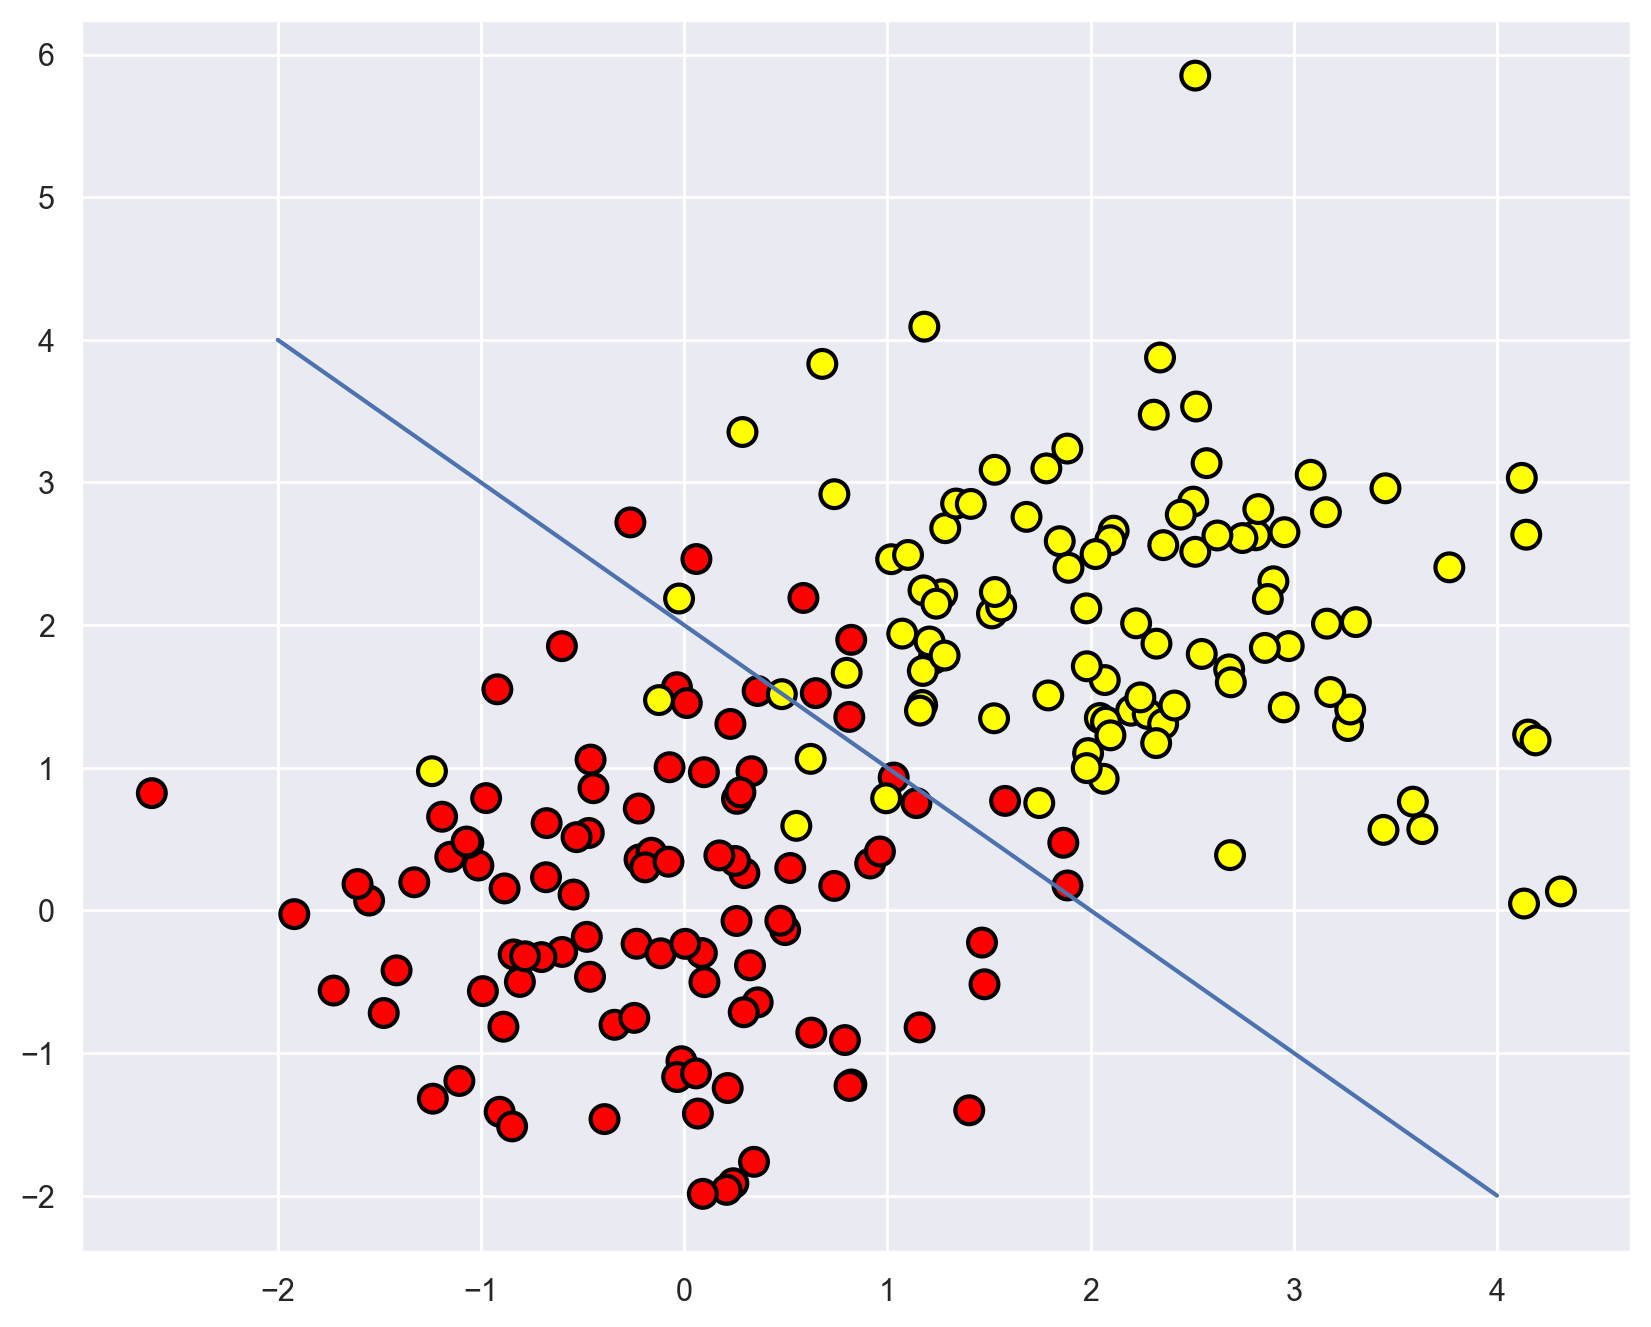

In [15]:
plt.figure(figsize = (10,8))
plt.scatter(
    train_data[:,0],
    train_data[:,1],
    s=100,
    c = train_labels,
    cmap = "autumn",
    edgecolors= "black",
    linewidth = 1.5,


)
plt.plot(range(-2, 5), range(4, -3, -1));

As you can see visually we can seperate both classes in the graph with a linear line . We shall try to seperate them using a Decision Tree now.

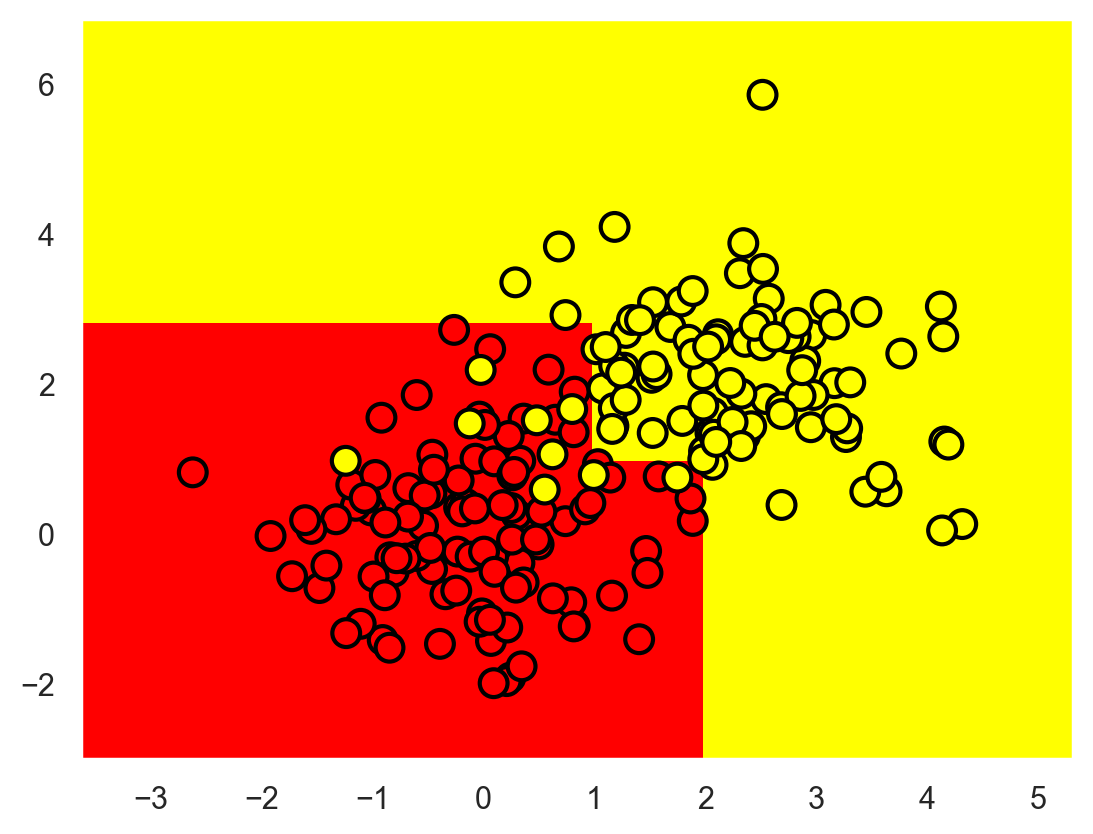

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Writing a helper function to visualize the data

def get_grid(data):
    x_min , x_max = data[:,0].min() - 1, data[:,0].max() + 1
    y_min , y_max = data[:,1].min() - 1, data[:,1].max() + 1
    return np.meshgrid(np.arange(x_min , x_max , 0.01),np.arange(y_min , y_max , 0.01))

clf_tree = DecisionTreeClassifier(criterion = "entropy" , max_depth = 3 , random_state = 17)

clf_tree.fit(train_data,train_labels)

xx , yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx,yy,predicted,cmap="autumn")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);


We shall now visualise the decision tree

In [17]:
import pydotplus
import graphviz
graphviz.set_default_engine('dot')
graphviz.set_default_format('png')
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree , feature_names , png_file_to_save):
    tree_str = export_graphviz(
        tree,feature_names=feature_names, filled = True , out_file=None
    )
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

In [18]:
tree_graph_to_png(tree=clf_tree,
                  feature_names=["x1","x2"],
                  png_file_to_save="topic3_decision_tree1.png")


Looking at the tree png generated we can see how the decision tree splits the samples according to the x and y co-ordinates of the samples. Now we shall look at how the decision tree works with numerical feautures

In [20]:
data = pd.DataFrame(
    {
        "Age" : [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Loan Default" : [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
    }
)
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [21]:
data.sort_values(by="Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


In [38]:
age_tree = DecisionTreeClassifier(criterion = "entropy" , random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)
tree_graph_to_png(
    tree = age_tree,
    feature_names=["Age"],
    png_file_to_save="topic3_decision_tree3.png"

)

In [39]:
data2 = pd.DataFrame({
        "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        "Salary": [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88],
        "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
    }
)
data2

,Age,Salary,Loan Default
0,17,25,1
1,64,80,0
2,18,22,1
3,20,36,0
4,38,37,1
5,49,59,0
6,55,74,0
7,25,70,1
8,29,33,1
9,31,102,0


In [40]:
data2.sort_values(by="Age")

,Age,Salary,Loan Default
0,17,25,1
2,18,22,1
3,20,36,0
7,25,70,1
8,29,33,1
9,31,102,0
10,33,88,1
4,38,37,1
5,49,59,0
6,55,74,0


In [43]:
age_sal_tree = DecisionTreeClassifier(criterion = "entropy" , random_state = 17)
age_sal_tree.fit(
    data2[["Age", "Salary"]].values, data2["Loan Default"].values
)
tree_graph_to_png(
    tree = age_sal_tree,
    feature_names=["Age", "Salary"],
    png_file_to_save="topic3_decision_tree4.png"
)

We can see in this tree the Algorithm decides to cut at the variables where the Maximum Information Gain is reached 

#Crucial Tree Parameters
We should never construct tree's to the maximum depth otherwise they shall start overfitting to the training data and will not be able to generalise well with new predictions. There are 2 exception to when we should construct tree's to maximum depth

Random Forest (a group of trees) averages the responses from individual trees that are built to the maximum depth (we will talk later on why you should do this)

Pruning trees. In this approach, the tree is first constructed to the maximum depth. Then, from the bottom up, some nodes of the tree are removed by comparing the quality of the tree with and without that partition (comparison is performed using cross-validation, more on this below).

The most common ways to deal with overfitting in decision trees are as follows:

artificial limitation of the depth or a minimum number of samples in the leaves: the construction of a tree just stops at some point;

pruning the tree.


#Using Decision Tree's to predict Numerical Values
When using Decision Tree's to predict a Numerical Target i.e a regression problem , we change the metric to the Variance 
$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{j=1}^{\ell} y_j)^2,$$

where $l$ is the number of samples in a leaf , $y_i$ is the value of the target variable. Simply put, by minimizing the variance, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

We shall see an example below. 

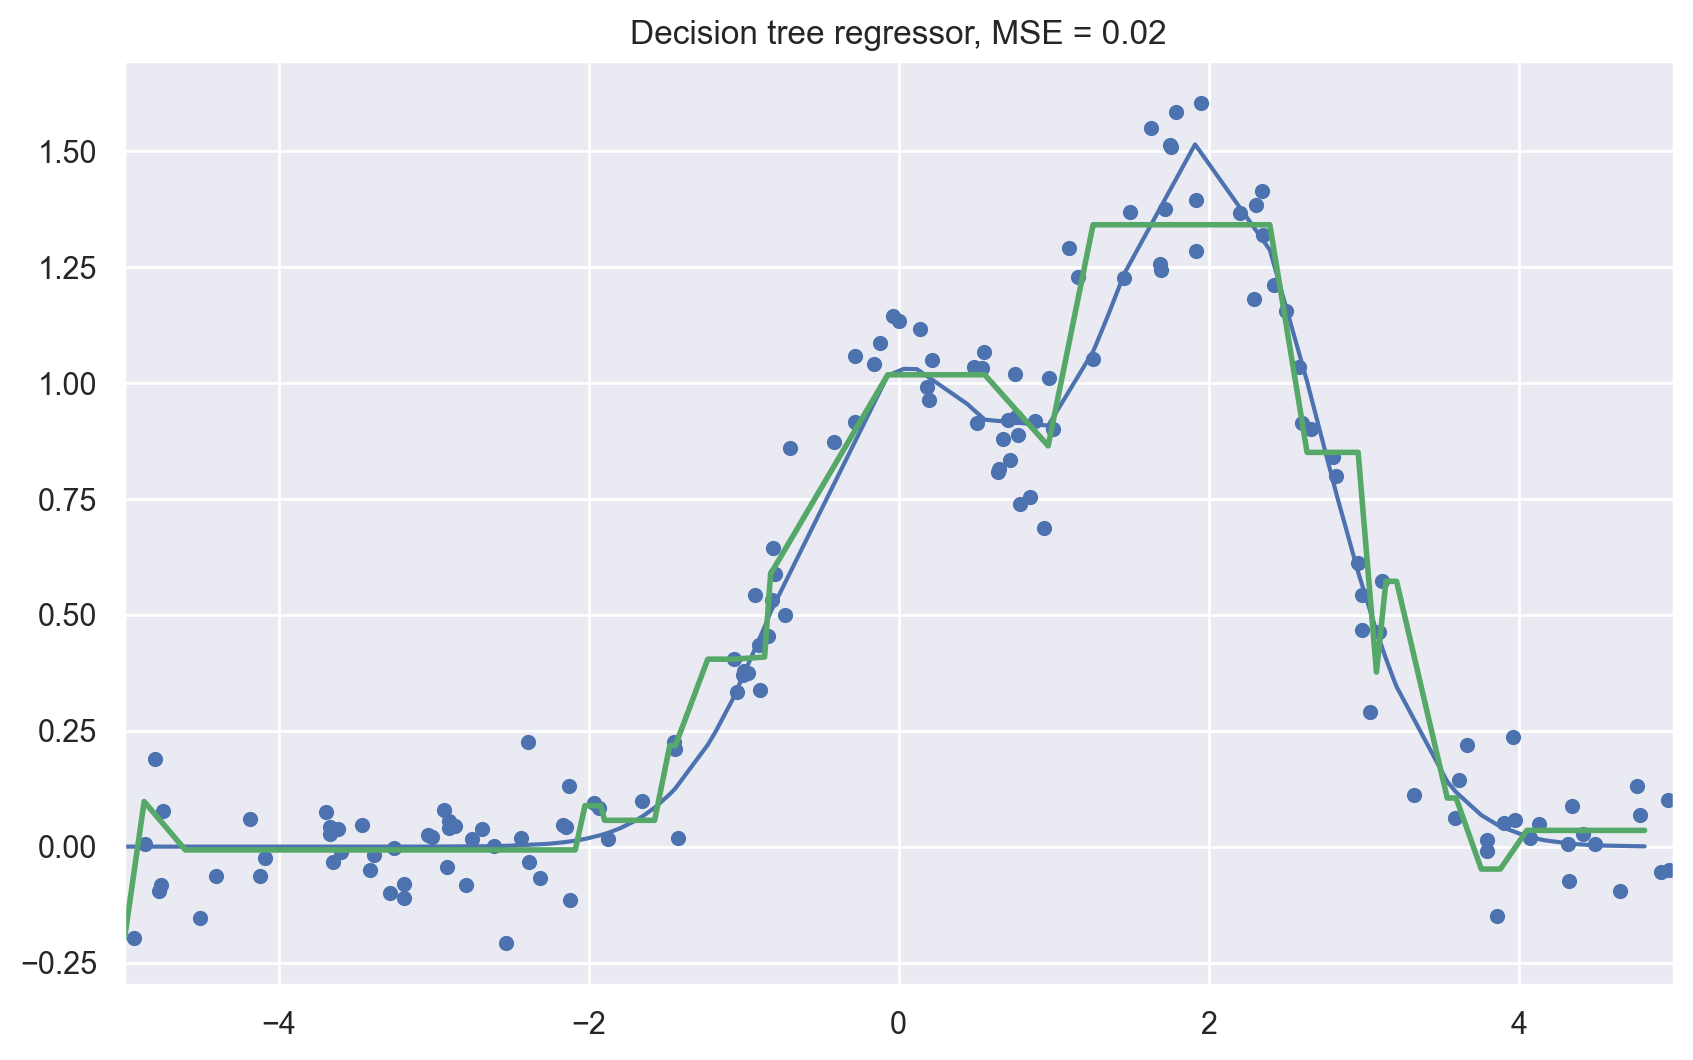

In [52]:
n_train =150
n_test = 100
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-(x**2))+1.5*np.exp(-((x - 2) ** 2))

def generate(n_samples , noise):
    X = np.random.rand(n_samples)*10 -5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y

X_train , y_train = generate(n_train , noise = noise)
X_test , y_test = generate(n_test , noise = noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train , y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()

tree_graph_to_png(tree=reg_tree,
                  feature_names=["x"],
                  png_file_to_save="topic3_decision_tree5.png")

We can see that the algorithm approximates the curve with a linear piecewise function